# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from statistics import mean
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

Citipy - is useful in this application because we are generating random coordinates (Lat, Lng) which are fed into citipy.  Citipy then returns the nearest city to those geo coordinates.

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
t_city=[]
lat_city=[]
lng_city=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
units="imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather_response = requests.get(query_url).json()
# Condition inserted to skip over cities which are not found.
    if (weather_response['cod']=='404'):
        print(f"City not found City name: {city}")
    else:
        print(f"Processing city id: {weather_response['id']} city name: {weather_response['name']}")
        t_city.append(weather_response['name'])
        lat_city.append(weather_response['coord']['lat'])
        lng_city.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
print(f"---------------------------------------------------------------------------")
print(f"Processing completed....")

Processing city id: 3874787 city name: Punta Arenas
Processing city id: 6201424 city name: Mataura
Processing city id: 546105 city name: Nikolskoye
Processing city id: 2110227 city name: Butaritari
Processing city id: 5106841 city name: Albany
Processing city id: 1862505 city name: Hirara
Processing city id: 2017155 city name: Saskylakh
Processing city id: 2022572 city name: Khatanga
Processing city id: 1649150 city name: Bengkulu
Processing city id: 1735106 city name: George Town
Processing city id: 6170031 city name: Tuktoyaktuk
Processing city id: 1015776 city name: Bredasdorp
Processing city id: 1634614 city name: Nabire
Processing city id: 2171099 city name: Codrington
Processing city id: 4032243 city name: Vaini
Processing city id: 3833367 city name: Ushuaia
Processing city id: 4020109 city name: Atuona
Processing city id: 2075265 city name: Busselton
Processing city id: 286987 city name: Nizwá
Processing city id: 3883457 city name: Lebu
Processing city id: 2156643 city name: Mou

Processing city id: 1526970 city name: Abay
Processing city id: 3175096 city name: Laas
Processing city id: 2014624 city name: Udachny
Processing city id: 5321473 city name: Winslow
Processing city id: 3601402 city name: Savannah Bight
Processing city id: 4000490 city name: La Reforma
Processing city id: 2413419 city name: Gunjur
Processing city id: 5847411 city name: Kahului
Processing city id: 1785738 city name: Yuncheng
Processing city id: 557413 city name: Iki-Burul
Processing city id: 4035249 city name: Lufilufi
Processing city id: 2444219 city name: Gouré
City not found City name: vaitupu
Processing city id: 2047258 city name: Novyy Urgal
Processing city id: 1266475 city name: Kishtwār
Processing city id: 4034551 city name: Faanui
Processing city id: 3471451 city name: Arraial do Cabo
Processing city id: 2426370 city name: Umm Hājar
Processing city id: 1927639 city name: Yueyang
City not found City name: lemesos
Processing city id: 2109701 city name: Auki
City not found City name

Processing city id: 2094342 city name: Kavieng
Processing city id: 553374 city name: Kaminskiy
Processing city id: 3397154 city name: Juazeiro
Processing city id: 3423146 city name: Ilulissat
City not found City name: karamken
Processing city id: 2062276 city name: Roebourne
Processing city id: 3461425 city name: Ilhabela
Processing city id: 2514651 city name: Los Llanos de Aridane
Processing city id: 3449293 city name: São Domingos
City not found City name: ribeirao do pinhal
Processing city id: 1633034 city name: Palu
Processing city id: 2646557 city name: Horsham
Processing city id: 2318921 city name: Wukari
Processing city id: 1490256 city name: Talnakh
Processing city id: 656739 city name: Ilmajoki
Processing city id: 1737185 city name: Kapit
Processing city id: 3893894 city name: Concepción
Processing city id: 6111862 city name: Port Hardy
Processing city id: 1272674 city name: Dhupgāri
Processing city id: 2028462 city name: Ulaanbaatar
Processing city id: 6111867 city name: Port

Processing city id: 64814 city name: Bandarbeyla
Processing city id: 454310 city name: Ventspils
Processing city id: 2172153 city name: Casino
Processing city id: 2447513 city name: Arlit
Processing city id: 2194098 city name: Ahipara
Processing city id: 3870282 city name: Talcahuano
Processing city id: 877631 city name: Namikupa
Processing city id: 3460629 city name: Itaqui
City not found City name: dolbeau
Processing city id: 6445060 city name: Sainte-Maxime
Processing city id: 3869716 city name: Tocopilla
Processing city id: 2315728 city name: Gemena
City not found City name: longlac
Processing city id: 605155 city name: Kiruna
Processing city id: 3157799 city name: Farsund
Processing city id: 2077895 city name: Alice Springs
Processing city id: 5882953 city name: Aklavik
Processing city id: 2299625 city name: Kintampo
Processing city id: 332746 city name: Korem
City not found City name: deh rawud
Processing city id: 3571913 city name: Marsh Harbour
Processing city id: 2269142 city 

## Convert Raw Data to DataFrame
* Save as csv

In [4]:
weather_info=pd.DataFrame({
            'City':t_city,
            'Lat':lat_city,
            'Lng':lng_city,
            'Max Temp':max_temp,
            'Humidity':humidity,
            'Cloudiness':cloudiness,
            'Wind Speed':wind_speed,
            'Country':country,
            'Date':date
})
weather_info.to_csv(output_data_file, index=False, header=True)

In [5]:
weather_info.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,41.00,86,90,14.99,CL,1603022154
1,Mataura,-46.19,168.86,50.00,77,100,3.00,NZ,1603022154
2,Nikolskoye,59.70,30.79,39.20,70,90,8.95,RU,1603022154
3,Butaritari,3.07,172.79,81.34,78,60,18.95,KI,1603022155
4,Albany,42.60,-73.97,35.01,100,20,3.40,US,1603022107


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

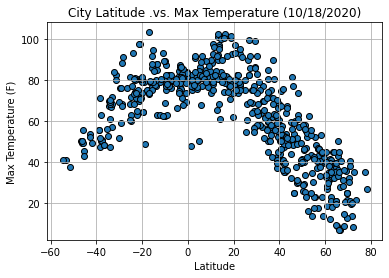

In [80]:
x_values=weather_info['Lat']
y_values=weather_info['Max Temp']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/Latitude.vs.Temperature.png")
plt.show()

This above plot shows the how the tempurate decreases the further you get away from the equator 0 degrees latitude.  This scatter plot show the dataset used leans towards the northern hemisphere. 

### Latitude vs. Humidity Plot

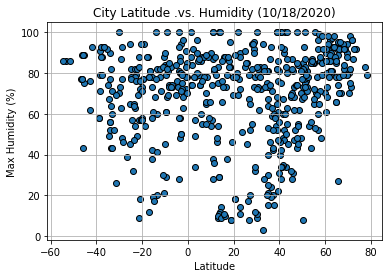

In [81]:
x_values=weather_info['Lat']
y_values=weather_info['Humidity']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Humidity (%)")
plt.grid()
plt.savefig("../output_data/Latitude.vs.Humidity.png")
plt.show()

In this scatter plot the majority of cities have a humidity factor of 60% or greater. Also this particular dataset, most of the cities are in the northern hemisphere..

### Latitude vs. Cloudiness Plot

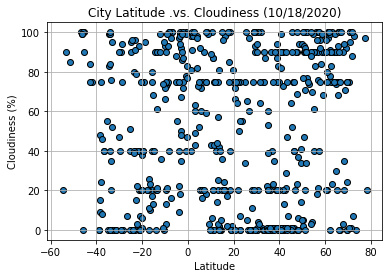

In [82]:
x_values=weather_info['Lat']
y_values=weather_info['Cloudiness']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/Latitude.vs.Cloudiness.png")
plt.show()

This scatter plot shows the majority of the cities either have 0 % Cloudiness or 80-100% Cloudiness.  The northern latitudes show a greater amount of datapoints in this dataset.

### Latitude vs. Wind Speed Plot

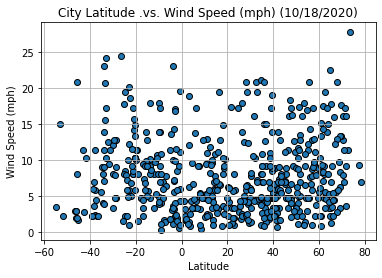

In [83]:
x_values=weather_info['Lat']
y_values=weather_info['Wind Speed']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Wind Speed (mph) (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/Latitude.vs.Wind_Speed.png")
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

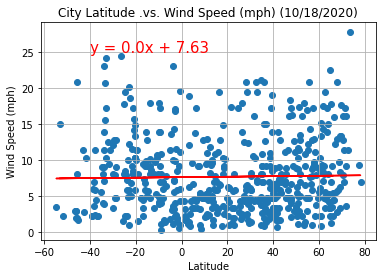

In [84]:
def slope_intercept(xlist,ylist):
    mean_of_x=mean(xlist)
    mean_of_y=mean(ylist)
    
    slope=(((mean_of_x * mean_of_y) - mean(xlist * ylist)) /
          (((mean_of_x)**2) - (mean(xlist**2))))
           
    intercept=mean_of_y - (slope*mean_of_x)
    
    return slope, intercept

#Call lregression function which returns slope and intercept
slope, intercept = slope_intercept(weather_info['Lat'],weather_info['Wind Speed'])          

#Calculate regression line
# formula is y=(slope*x)+intercept
regline=[(slope*x)+intercept for x in weather_info['Lat']]
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))           
plt.scatter(weather_info['Lat'],weather_info['Wind Speed'])
plt.plot(weather_info['Lat'],regline,"r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.title("City Latitude .vs. Wind Speed (mph) (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/City_Latitude.vs.Wind_Speed.png")
plt.show()

I wrote a slope intercept function which returns the slope and intercept of a given dataset. The scatter plot shows the majority of the cities to have wind speeds 10 mph or less. The line regression, though slight shows the wind speeds are greater as you go north. But also shows the dataset is not evenly distributed.

# Plotting Function used for following Scatterplots

In [60]:
def scatter_plot(hemisphere,title,xlabel,ylabel,xpos,ypos):
    equatorlat=0
    if (hemisphere=="northern"):
        h_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
    elif (hemisphere=="southern"):
        h_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
    else:
        h_weather_info=weather_info
    xlist=h_weather_info['Lat']
    ylist=h_weather_info[ylabel]
    date=time.strftime("%m/%d/%y")
    (slope, intercept, rvalue, pvalue, stderr)=linregress(xlist,ylist)
    regress_values=xlist*slope+intercept
    line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xlist,ylist,edgecolor='black')
    plt.plot(xlist,regress_values,"r-")
    plt.annotate(line_eq,(xpos,ypos),fontsize=15,color="red")
    plt.title(title+"(" + date + ")")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    print(f"The rvalue is: {rvalue**2}")
    plt.savefig("../output_data/"+title+".png")
    plt.show()
    return pvalue

Function scatter_plot is used for the below graphs.  Its assumption is that the x axis value is always 'Lat' due to the fact all the below graphs have latitude as their x axis.  Its parameters are:

scatter_plot("northern, southern or whole", "title of graph", "x axis label", "y axis label", xpos, ypos of equation on graph)

for the first parameter I didn't check for "whole" due to the fact I wanted it to default in to whole not to make it fail.

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: 0.7205348323830367


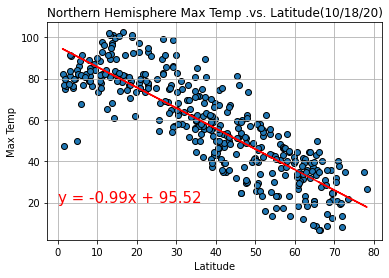

In [72]:
title="Northern Hemisphere Max Temp .vs. Latitude"
xlabel="Latitude"
ylabel="Max Temp"
pvalue=scatter_plot("northern",title,xlabel,ylabel,0,20)

This scatter plot shows a strong correlation between tempurature and latitude with a high r^2 value for the northern hemisphere. The further north you go the colder the tempurature is.

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: 0.48329850686694215


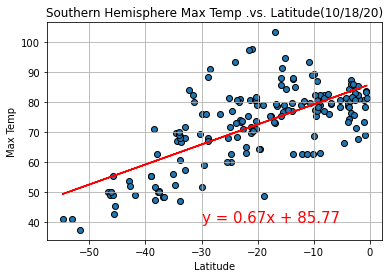

In [73]:
title="Southern Hemisphere Max Temp .vs. Latitude"
xlabel="Latitude"
ylabel="Max Temp"
pvalue=scatter_plot("southern",title,xlabel,ylabel,-30,40)

This scatter plot contains less datapoints, showing the correlation between tempurature and latitude.  The R^2 value shows that correlation.  Obviously the further south you go the cooler it becomes.  One interesting observation is that the datapoints seem to be not packed as tightly as they were in the Northern Hemisphere.  

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.055720608764318655


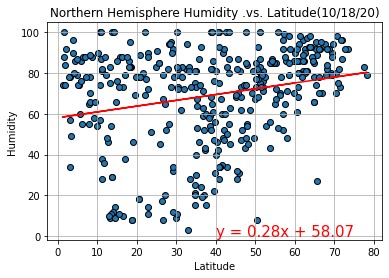

In [74]:
title="Northern Hemisphere Humidity .vs. Latitude"
xlabel="Latitude"
ylabel="Humidity"
pvalue=scatter_plot("northern",title,xlabel,ylabel,40,0)

The humidity in the northern hemisphere seems to increase the further north you go.  But the r^2 value is low which says that the humidity and latitude are not closely related in this scatterplot.

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.0011212081753721877


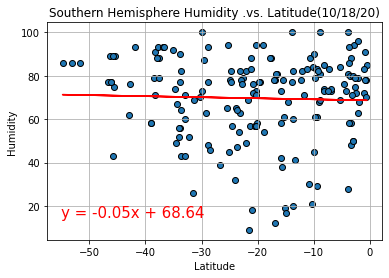

In [75]:
title="Southern Hemisphere Humidity .vs. Latitude"
xlabel="Latitude"
ylabel="Humidity"
pvalue=scatter_plot("southern",title,xlabel,ylabel,-55,15)

The southern hemisphere seems to show less of an increase in humidity the further south you go.  The r^2 value is very low which shows that Humidity and Latitude almost have no correlation in this scatterplot.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.020979383086023585


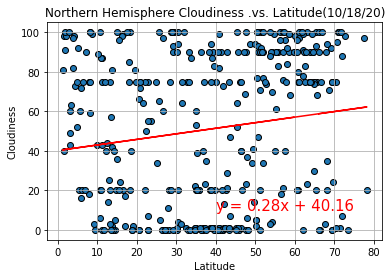

In [76]:
title="Northern Hemisphere Cloudiness .vs. Latitude"
xlabel="Latitude"
ylabel="Cloudiness"
jpvalue=scatter_plot("northern",title,xlabel,ylabel,40,10)

The line regression shows an increase in cloudiness the further north you go, but the r^2 value is very low which shows that cloudiness and latitude are not closely related in this scatterplot.

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.016565901388760247


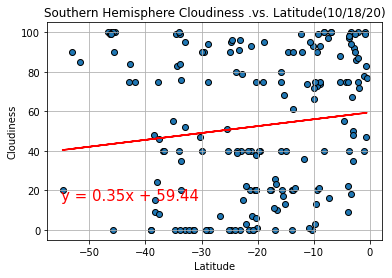

In [77]:
title="Southern Hemisphere Cloudiness .vs. Latitude"
xlabel="Latitude"
ylabel="Cloudiness"
pvalue=scatter_plot("southern",title,xlabel,ylabel,-55,15)

This scatterplot has an r^2 value is very low which shows that cloudiness and latitude have a very weak correlation here.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: 0.05257267480488398


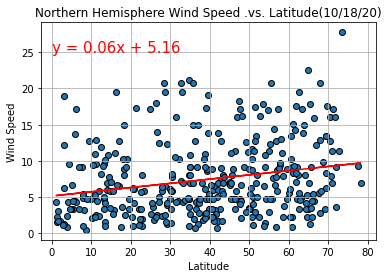

In [78]:
title="Northern Hemisphere Wind Speed .vs. Latitude"
xlabel="Latitude"
ylabel="Wind Speed"
pvalue=scatter_plot("northern",title,xlabel,ylabel,0,25)

The r^2 value is very low which shows a weak correlation between Wind Speed and Latitude in this scatterplot.

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: 0.0008275512647930853


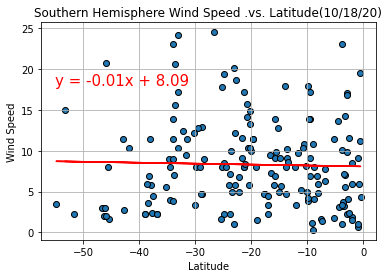

In [79]:
title="Southern Hemisphere Wind Speed .vs. Latitude"
xlabel="Latitude"
ylabel="Wind Speed"
pvalue=scatter_plot("southern",title,xlabel,ylabel,-55,18)

The r^2 value is very low which again shows that Wind Speed and Latitude in this scatterplot not to be closely related.

# Longitude vs Latitude

The rvalue is: 0.006258230205911459


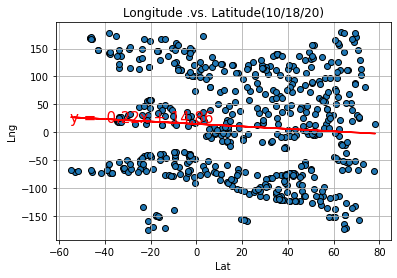

The pvalue is: 0.06398827979108829 This is a normalized dataset.


In [63]:
title="Longitude .vs. Latitude"
xlabel="Lat"
ylabel="Lng"
pvalue=scatter_plot("whole",title,xlabel,ylabel,-55,18)
if (pvalue<.05):
    distribution="This is an unnormalized dataset."
else:
    distribution="This is a normalized dataset."
print(f"The pvalue is: {pvalue} {distribution}")

I decided to run a scatterplot Longitude vs Latitude.  The r^2 value is very low which shows that they are not closely related in this graph.  The pvalue is above .05 in this run of this dataset shows that this is an normalized dataset. But just glancing at the above there seems to be more datapoints in the northern latitudes than there are in the southern latitudes.